In [2]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

From article 
\begin{equation}
\frac{dM_{un}}{dt} = k_1L_m - \left(k_2\frac{I_1^{\eta}}{I_1^{\eta} + c_2^{\eta}} + k_3\frac{T_{\alpha}^{\beta}}{T_{\alpha}^{\beta} + c_3^{\beta}} + k_4\frac{I_{10}^{\rho}}{I_{10}^{\rho} + c_4^{\rho}}\right)M_{un} - d_1M_{un},
\end{equation}

\begin{equation}
\frac{dM_1}{dt} = \left(k_2\frac{I_1^{\eta}}{I_1^{\eta} + c_2^{\eta}} + k_3\frac{T_{\alpha}^{\beta}}{T_{\alpha}^{\beta} + c_3^{\beta}}\right)M_{un} + k_5M_2 - k_6M_1 - d_1M_1, 
\end{equation}

\begin{equation}
\frac{dM_2}{dt} = k_4M_{un}\frac{I_{10}^{\rho}}{I_{10}^{\rho} + c_4^{\rho}} + k_6M_1 -k_5M_2 - d_1M_2,
\end{equation}

\begin{equation}
\frac{dT_{\alpha}}{dt} = \left(\lambda_3M_1 + \lambda_1D_{dam}\right)\frac{c_5}{c_5 + I_{10}} -d_3T_{\alpha},
\end{equation}

\begin{equation}
\frac{dI_1}{dt} = \left(\lambda_4M_1 + \lambda_2D_{dam}\right)\frac{c_5}{c_5 + I_{10}} - d_4I_1,
\end{equation}

\begin{equation}
\frac{dI_{10}}{dt} = \lambda_5M_2\frac{c_1}{c_1 + I_{10}} - d_2I_{10}.
\end{equation}

$M_{un} = M_{un}^{*}M_0$, $M_{1} = M_{1}^{*}M_0$,$M_{2} = M_{2}^{*}M_0$,$I_1 = I_1^{*}C$,$I_{10} = I_{10}^{*}C$,$T_{\alpha} = T_{\alpha}^{*}C$.

\begin{equation}
\frac{M_0}{T}\frac{dM_{un}^{*}}{dt^{*}} = k_1L_m-\left(k_2\frac{1}{1 + {c_2^{*}}^{\eta}/{I_1^{*}}^{\eta}} + k_3\frac{1}{1 + {c_3^{*}}^{\beta}/{T_{\alpha}^{*}}^{\beta}} + k_4\frac{1}{1 + {c_4^{*}}^{\rho}/{I_{10}^{*}}^{\rho}}\right)M_{un}^{*}M_0 - d_1M_{un}^{*}M_0
\end{equation}

\begin{equation}
\frac{M_{un}^{*}}{dt^{*}} = \frac{k_1L_mT}{M_0} - M_{un}^{*}\left( Tk_2^{*}\frac{1}{1 + {c_2^{*}}^{\eta}/{I_1^{*}}^{\eta}} + Tk_3^{*}\frac{1}{1 + {c_3^{*}}^{\beta}/{T_{\alpha}^{*}}^{\beta}} + Tk_4^{*}\frac{1}{1 + {c_4^{*}}^{\rho}/{I_{10}^{*}}^{\rho}} + Td_1^{*}\right)
\end{equation}

\begin{equation}
\frac{M_0}{T}\frac{dM_1^{*}}{dt^{*}} = \left(k_2\frac{1}{1 + {c_2^{*}}^{\eta}/I_1^{\eta}} + k_3\frac{1}{1 + {c_3^{*}}^{\beta}/{T_{\alpha}}^{\beta}} \right)M_{un}^{*}M_0 + k_5M_2^{*}M_0 - k_6M_1^{*}M_0 - d_1M_1^{*}M_0
\end{equation}

\begin{equation}
\frac{dM_1^{*}}{dt^{*}} = \left(k_2T\frac{1}{1 + {c_2^{*}}^{\eta}/I_1^{\eta}} + k_3T\frac{1}{1 + {c_3^{*}}^{\beta}/{T_{\alpha}}^{\beta}} \right)M_{un}^{*} + k_5M_2^{*}T - M_1(Tk_6^{*} + Td_1^{*} )
\end{equation}

\begin{equation}
\frac{M_0}{T}\frac{dM_2^{*}}{dt^{*}} = k_4M_{un}^{*}M_0\frac{1}{1 + {c_4^{*}}^{\rho}/{I_{10}^{*}}^{\rho}} + k_6M_1^{*}M_0 - k_5M_2^{*}M_0 - d_1M_2^{*}M_0
\end{equation}

\begin{equation}
\frac{dM_2^{*}}{dt^{*}} = k_4TM_{un}^{*}\frac{1}{1 + {c_4^{*}}^{\rho}/{I_{10}^{*}}^{\rho}} + k_6TM_1^{*} - M_2^{*}(k_5T + d_1T)
\end{equation}

\begin{equation}
\frac{C}{T}\frac{dT_{\alpha}^{*}}{dt^{*}} = \left(\frac{\lambda_3^{*}C}{M_0}M_1^{*}M_0 + \frac{\lambda_1^{*}C}{M_0}D_{dam}\right)\frac{1}{1 + I_{10}^{*}/c_5^{*}} - d_3T_{\alpha}^{*}C
\end{equation}

\begin{equation}
\frac{dT_{\alpha}^{*}}{dt^{*}} = \left(\lambda_3^{*}M_1^{*}T + \frac{T\lambda_1^{*}}{M_0}D_{dam}\right)\frac{1}{1 + I_{10}^{*}/c_5^{*}} - Td_3T_{\alpha}^{*}
\end{equation}

\begin{equation}
\frac{C}{T}\frac{I_1^{*}}{dt^{*}} = \left(\frac{\lambda_4^{*}C}{M_0}M_1^{*}M_0 + \frac{\lambda_2^{*}C}{M_0}D_{dam}\right)\frac{1}{1 + I_{10}^{*}/c_{5}^{*}} - d_4I_1^{*}C 
\end{equation}

\begin{equation}
\frac{dI_1^{*}}{dt^{*}} = \left(\lambda_4^{*}M_1^{*}T + \frac{T\lambda_2^{*}}{M_0}D_{dam}\right)\frac{1}{1 + I_{10}^{*}/c_{5}^{*}} - Td_4I_1^{*}
\end{equation}

\begin{equation}
\frac{C}{T}\frac{dI_{10}^{*}}{dt^{*}} = \frac{\lambda_5^{*}C}{M_0}M_2^{*}M_0\frac{1}{1 + I_{10}^{*}/c_1^{*}} - d_2I_{10}^{*}C
\end{equation}

\begin{equation}
\frac{dI_{10}^{*}}{dt^{*}} = T\lambda_5^{*}M_2^{*}\frac{1}{1 + I_{10}^{*}/c_1^{*}} - Td_2I_{10}^{*}
\end{equation}

After scalling and seting $M_{un}^{*} = y$, $M_1^{*} = x_1$, $M_2^{*} = x_2$, $T_{\alpha}^{*} = a$, $I_1^{*} = z_1$, $I_{10}^{*} = z_2$. We omit the * sign for constants c, $\lambda$, d. 

\begin{equation}
\frac{dy}{dt} = T\alpha - \left(Tk_2\frac{1}{1 + c_2^{\eta}/z_1^{\eta}} + Tk_3\frac{1}{1 + c_3^{\beta}/a^{\beta}} + Tk_4\frac{1}{1 + c_4^{\rho}/z_2^{\rho}} + Td_1\right)y,
\end{equation}

\begin{equation}
\frac{dx_1}{dt} = \left(Tk_2\frac{1}{1 + c_2^{\eta}/z_1^{\eta}}+Tk_3\frac{1}{1 + c_3^{\beta}/a^{\beta}}\right)y +Tk_5x_2 - x_1(Tk_6 + Td_1),
\end{equation}

\begin{equation}
\frac{dx_2}{dt} = Tk_4y\frac{1}{1 + c_4^{\rho}/z_2^{\rho}} + Tk_6x_1 - x_2(Tk_5 + Td_1),
\end{equation}

\begin{equation}
\frac{da}{dt} = \left(T\lambda_3x_1 + T\lambda_1/M_0 D_{dam}\right)\frac{1}{1 + z_2/c_5} - Td_3a,
\end{equation}

\begin{equation}
\frac{dz_1}{dt} = \left(T\lambda_4x_1 + T\lambda_2/M_0D_{dam}\right)\frac{1}{1 + z_2/c_5} - Td_4z_1, 
\end{equation}

\begin{equation}
\frac{dz_2}{dt} = T\lambda_5x_2\frac{1}{1 + z_2/c_1} - Td_2z_2.
\end{equation}

In [3]:
# Define the parameters of the model
k1 = 1.869
k2 = 80.815
k3 =  80.188
k4 = 44.344
k5 = 0.509
k6 =  1.025
####################
d1 = 0.95
d2 =  2.581
d3 = 0.330
d4 =  0.481
######################
C1 = 7.652
C2 =  0.2005
C3 =  0.419
C4 =  22.715
C5 =  3.723
#####################
lambda1 = 3.4*(10**(-9))
lambda2 = 3.4*(10**(-9))
lambda3 = 2.0*(10**(-7))
lambda4 = 8.6*(10**(-7))
lambda5 = 3.5*(10**(-5))
##################################
M_0 = 2*(10**(3)) # 2*10^3 cells/ml
C = 10 #pg/ml
L_m = 0.35 #0.35cell/ml
beta =2
eta = 3
rho =0.5

T=1/k2
alpha = k1*L_m/M_0 #(k1*L_m)/M_0

In [4]:
print("T*alpha = ", T*alpha)
print("T*k2 = ", T*k2)
print("T*k3 = ", T*k3)
print("T*k4 = ",T*k4)
print("T*d1 = ",T*d1)

T*alpha =  4.047206582936337e-06
T*k2 =  1.0
T*k3 =  0.992241539318196
T*k4 =  0.5487100167048197
T*d1 =  0.01175524345727897


In [5]:
print("T*k5 = ",T*k5)
print("T*k6 + T*d1 = ",T*k6 + T*d1)

T*k5 =  0.006298335705005259
T*k6 + T*d1 =  0.024438532450658912


In [6]:
print("T*k6 = ",T*k6)
print("T*k5 + T*d1 = ",T*k5 + T*d1)

T*k6 =  0.012683288993379942
T*k5 + T*d1 =  0.018053579162284228


In [7]:
print("T*lambda3 = ",T*lambda3)
print("T*lambda1/M_0Dam = ",T*lambda1*7*(10**(9))/M_0)

T*lambda3 =  2.474788096269257e-09
T*lambda1/M_0Dam =  0.0001472498917280208


In [8]:
print("T*lambda4 = ",T*lambda4)
print("T*lambda2/M_0Dam = ",T*lambda2*7*(10**(9))/M_0)

T*lambda4 =  1.0641588813957804e-08
T*lambda2/M_0Dam =  0.0001472498917280208


In [9]:
print("T*lambda5 = ",T*lambda5)
print("T*d2 = ",T*d2)

T*lambda5 =  4.3308791684712007e-07
T*d2 =  0.03193714038235476


In [10]:
print("T*d3 = ",T*d3)

T*d3 =  0.004083400358844275


In [11]:
print("T*d4 = ",T*d4)

T*d4 =  0.005951865371527563


In [12]:
def ODE(t, y0):
    #y, x1, x2, a, z1, z2 = y0
    y, x1, x2, a, z1, z2,Ddam, = y0
    
    dDam = -0.5*Ddam

    dy = T*k1*L_m/M_0 - y*(T*k2*1/(1 + (C2/z1)**(eta))+T*k3*1/(1+(C3/a)**(beta)) + T*k4*1/(1+(C4/z2)**(rho)) + d1*T)
 
    dx1 = y*(T*k2*1/(1+(C2/z1)**(eta)) + T*k3*1/(1+(C3/a)**(beta))) + T*k5*x2 - x1*(T*k6+T*d1)

    dx2 = y*T*k4*1/(1+(C4/z2)**(rho)) + T*k6*x1 - x2*(T*k5+T*d1)

    da = (T*lambda3*x1 + T*lambda1/M_0*(7*(10**(9)) - Ddam))*(1/(1+z2/C5))-T*d3*a

    dz1 = (T*lambda4*x1 + T*lambda2/M_0*(7*(10**(9)) - Ddam))*(1/(1+z2/C5)) - T*d4*z1

    dz2 = T*lambda5*x2*(1/(1+z2/C1)) - T*d2*z2

    
    return [dy, dx1, dx2, da, dz1, dz2,dDam]

In [13]:
y_0 = 1
x1_0= 0
x2_0 = 0
a_0 = 1.5
z1_0 = 8
z2_0 = 0.1
Ddam_0 = 7*(10**(9))
Lm_0 = 0#0.01*10**(7)
y1 = [y_0, x1_0, x2_0, a_0, z1_0, z2_0,Ddam_0]

In [14]:
t0 = 0.0
tf = 400.0 #*days*k2 \sim 400
t_eval = np.linspace(t0, tf, 501)

In [15]:
sol = solve_ivp(ODE, [t0, tf],method = "BDF", y0 = y1, t_eval=t_eval)

In [16]:
plt.rcParams["figure.figsize"] = [20, 10]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure

plt.subplot(2,3,1)
plt.plot(sol.t,sol.y[0])
plt.title('Inactivated macrophage')
plt.ylabel('Values')

plt.subplot(2,3,2)
plt.plot(sol.t,sol.y[1])
plt.title('Activation rate of M1 macrophages')

plt.subplot(2,3,3)
plt.plot(sol.t,sol.y[2])
plt.title('Activation rate of M2 macrophages')

plt.subplot(2,3,4)
plt.plot(sol.t,sol.y[3])
plt.title('Deposition rate of TNF-a')
plt.xlabel(r"$\tau$")
plt.ylabel('Values')

plt.subplot(2,3,5)
plt.plot(sol.t,sol.y[4])
plt.title('Deposition rate of IL-1')
plt.xlabel(r"$\tau$")

plt.subplot(2,3,6)
plt.plot(sol.t,sol.y[5])
plt.title('Secretion rate of IL-10')
plt.xlabel(r"$\tau$")

#plt.savefig("analiza_ODE.png")
plt.show()

In [17]:
y = sol.y[0]
x1 = sol.y[1]
x2 = sol.y[2]
a = sol.y[3]
z1 = sol.y[4]
z2 = sol.y[5]

In [18]:
factor1_y = 1/(1 + (C2/z1)**(eta))
factor2_y = 1/(1+(C3/a)**(beta))
factor3_y = 1/(1+(C4/z2)**(rho))
factor_a = 1/(1+z2/C5)
factor_z2 = 1/(1+z2/C1)

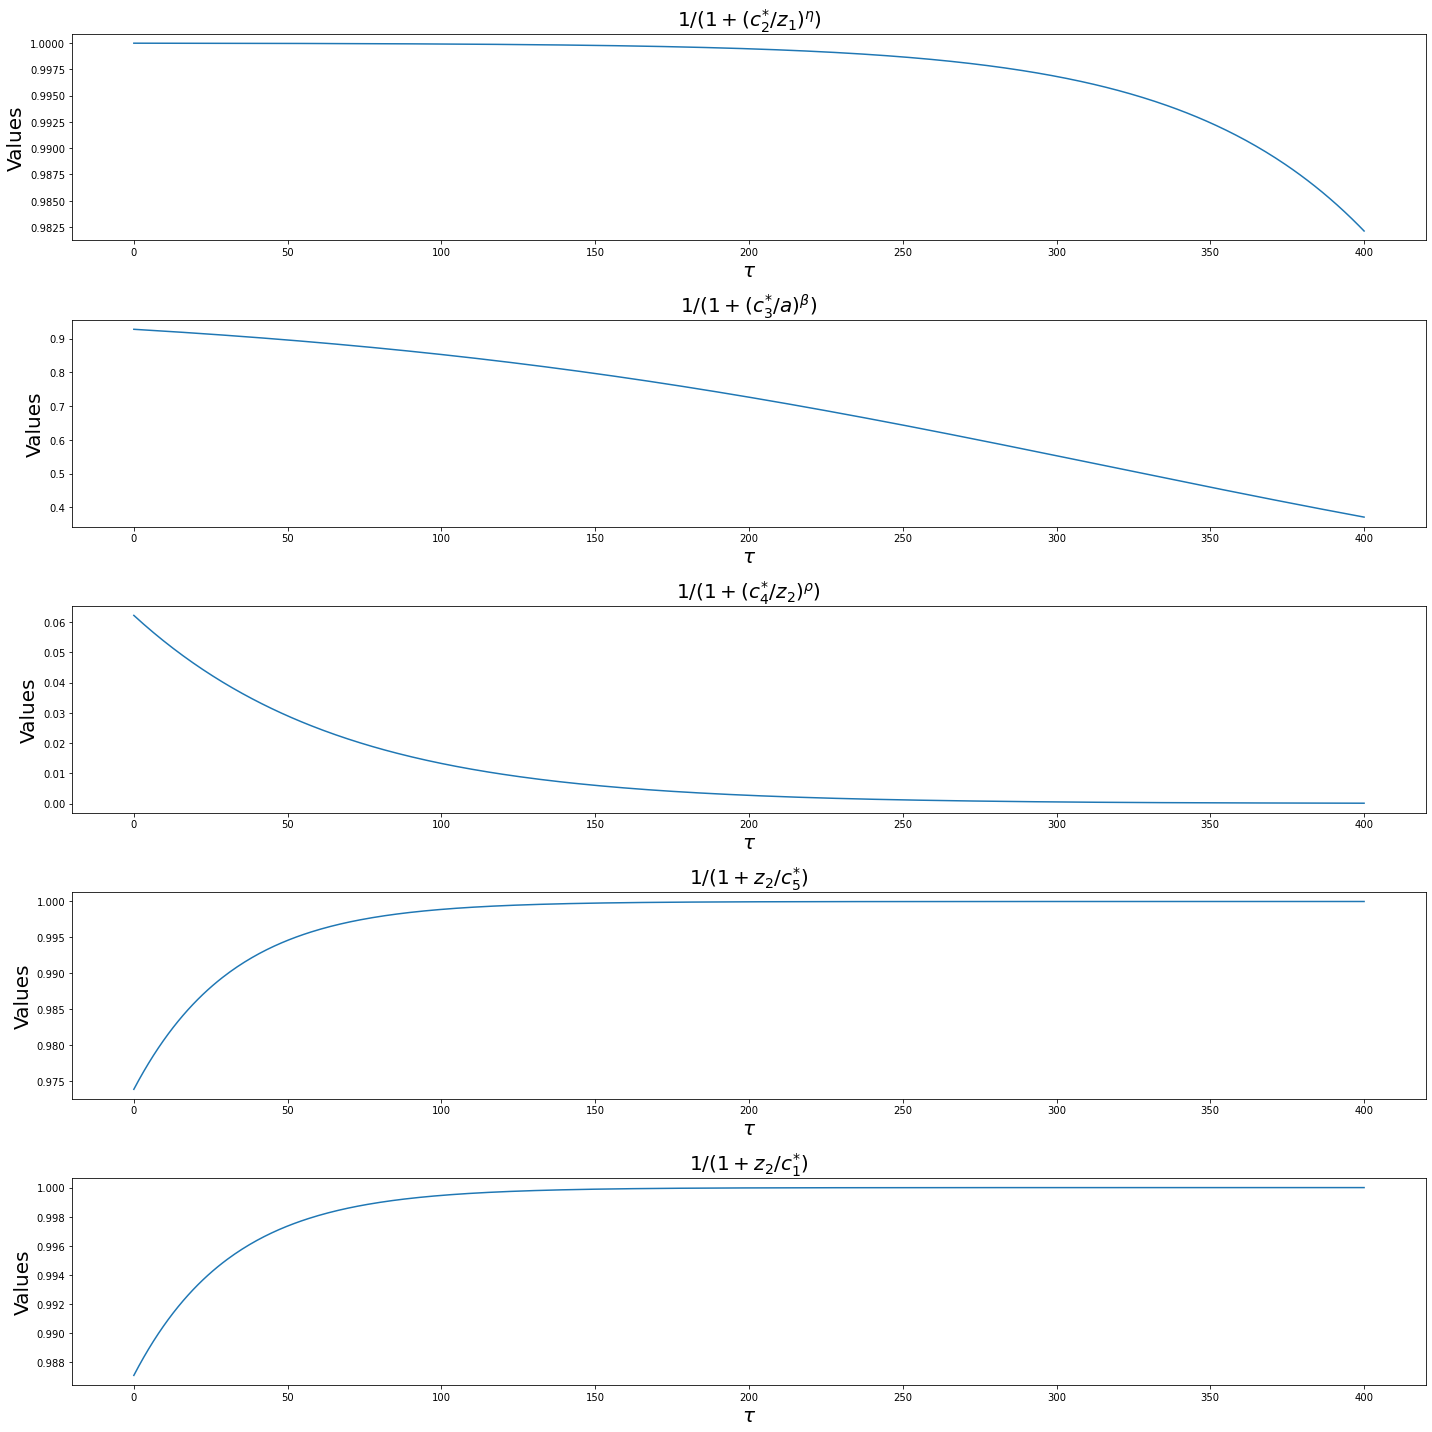

In [19]:
plt.rcParams["figure.figsize"] = [20, 20]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure

plt.subplots_adjust(hspace=0.8)

plt.subplot(5,1,1)
plt.plot(sol.t, factor1_y)
plt.title('$1/(1 + (c_2^{*}/z_1)^{\eta})$',fontsize=20)
plt.ylabel('Values', fontsize=20)
plt.xlabel(r"$\tau$", fontsize=20)

plt.subplot(5,1,2)
plt.plot(sol.t, factor2_y)
plt.title(r'$1/(1 + (c_3^{*}/a)^{\beta})$',fontsize=20)
plt.ylabel('Values', fontsize=20)
plt.xlabel(r"$\tau$", fontsize=20)


plt.subplot(5,1,3)
plt.plot(sol.t, factor3_y)
plt.title(r'$1/(1 + (c_4^{*}/z_2)^{\rho})$', fontsize=20)
plt.ylabel('Values', fontsize=20)
plt.xlabel(r"$\tau$", fontsize=20)

plt.subplot(5,1,4)
plt.plot(sol.t, factor_a)
plt.title(r'$1/(1+z_2/c_5^{*})$', fontsize=20)
plt.ylabel('Values', fontsize=20)
plt.xlabel(r"$\tau$", fontsize=20)

plt.subplot(5,1,5)
plt.plot(sol.t, factor_z2)
plt.title(r'$1/(1+z_2/c_1^{*})$', fontsize=20)
plt.ylabel('Values', fontsize=20)
plt.xlabel(r"$\tau$", fontsize=20)
plt.tight_layout()
#plt.savefig("C:\\Users\\nadia\\Desktop\\magisterka\\model\\factors.pdf")
plt.show()

## Simplification and comparison

For every $\lambda$ we set 0. For $\frac{1}{(1 + (c_2/z_1)^{\eta})} = 1$,$\frac{1}{(1 + (c_3/a)^{\beta})} = 1$,$\frac{1}{(1 + (c_4/z_2)^{\rho})} = 0$, $\frac{1}{(1 + (c_2/c_5))} = 1$,$\frac{1}{(1 + (c_2/z_1))} = 1$

Now model looks:
\begin{equation}
\frac{dy}{dt} = T\alpha - \left(Tk_2 + Tk_3 + Td_1\right)y,
\end{equation}

\begin{equation}
\frac{dx_1}{dt} = Tk_2 + Tk_3y +Tk_5x_2 - x_1(Tk_6 + Td_1),
\end{equation}

\begin{equation}
\frac{dx_2}{dt} = Tk_6x_1 - x_2(Tk_5 + Td_1),
\end{equation}

\begin{equation}
\frac{da}{dt} = - Td_3a,
\end{equation}

\begin{equation}
\frac{dz_1}{dt} = - Td_4z_1, 
\end{equation}

\begin{equation}
\frac{dz_2}{dt} = - Td_2z_2.
\end{equation}

In [20]:
# Define the parameters of the model
k1 = 1.869
k2 = 80.815
k3 =  80.188
k4 = 44.344
k5 = 0.509
k6 =  1.025
####################
d1 = 0.95
d2 =  2.581
d3 = 0.330
d4 =  0.481
######################
C1 = 7.652
C2 =  0.2005
C3 =  0.419
C4 =  22.715
C5 =  3.723
#####################
lambda1 = 0#3.4*(10**(-9))
lambda2 = 0#3.4*(10**(-9))
lambda3 = 0#2.0*(10**(-7))
lambda4 = 0#8.6*(10**(-7))
lambda5 = 0#3.5*(10**(-5))
##################################
M_0 = 2*(10**(3)) # 2*10^3 cells/ml
C = 10 #pg/ml
L_m = 0.35#0.01*10**(7) #0.35cell/ml
beta =2
eta = 3
rho =0.5

T=1/k2
alpha = 0#k1*L_m/M_0#(k1*L_m)/M_0

In [21]:
def ODE_3(t, y0):
    #y, x1, x2, a, z1, z2 = y0
    y, x1, x2, a, z1, z2,Ddam, = y0
    
    dDam = -0.5*Ddam

    dy = 0 - y*(T*k2*1+T*k3*1 + T*k4*0 + d1*T*0)
 
    dx1 = y*(T*k2*1 + T*k3*1) + T*k5*x2 - x1*(T*k6+T*d1)

    dx2 = y*T*k4*0 + T*k6*x1 - x2*(T*k5+T*d1)

    da = (T*lambda3*x1 + T*lambda1/M_0*(7*(10**(9)) - Ddam))*1-T*d3*a

    dz1 = (T*lambda4*x1 + T*lambda2/M_0*(7*(10**(9)) - Ddam))*1 - T*d4*z1

    dz2 = T*lambda5*x2*1 - T*d2*z2

    
    return [dy, dx1, dx2, da, dz1, dz2,dDam]

In [22]:
sol3 = solve_ivp(ODE_3, [t0, tf],method = "BDF", y0 = y1, t_eval=t_eval)

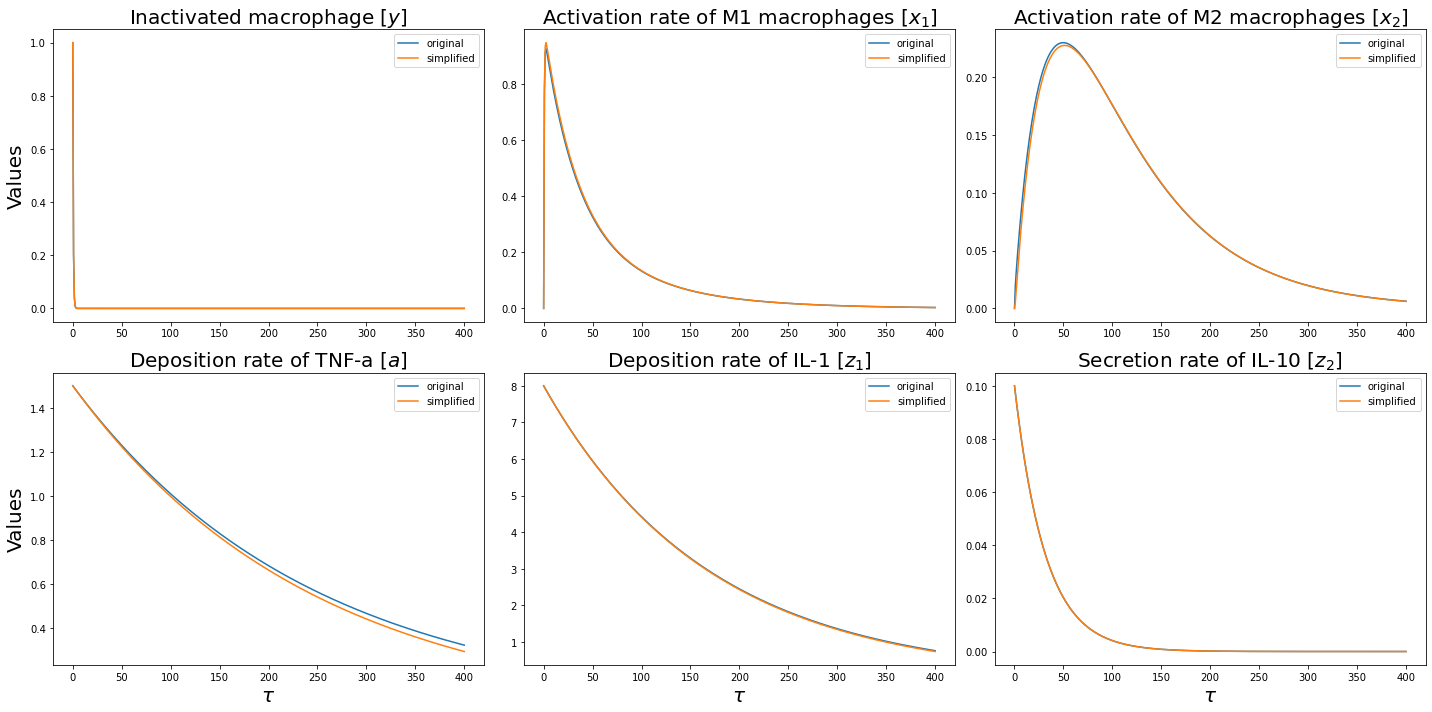

In [23]:
plt.rcParams["figure.figsize"] = [20, 10]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure

plt.subplots_adjust(hspace=0.9)

plt.subplot(2,3,1)
plt.plot(sol.t, sol.y[0])
plt.plot(sol3.t,sol3.y[0])
plt.title(r'Inactivated macrophage [$y$]', fontsize=20)
plt.legend(["original","simplified"])
plt.ylabel('Values', fontsize=20)

plt.subplot(2,3,2)
plt.plot(sol.t,sol.y[1])
plt.plot(sol3.t,sol3.y[1])
plt.legend(["original","simplified"])
plt.title(r'Activation rate of M1 macrophages [$x_1$]', fontsize=20)

plt.subplot(2,3,3)
plt.plot(sol.t,sol.y[2])
plt.plot(sol3.t,sol3.y[2])
plt.legend(["original","simplified"])
plt.title(r'Activation rate of M2 macrophages [$x_2$]', fontsize=20)

plt.subplot(2,3,4)
plt.plot(sol.t,sol.y[3])
plt.plot(sol3.t,sol3.y[3])
plt.title(r'Deposition rate of TNF-a [$a$]', fontsize=20)
plt.legend(["original","simplified"])
plt.xlabel(r"$\tau$",fontsize=20)
plt.ylabel('Values', fontsize=20)

plt.subplot(2,3,5)
plt.plot(sol.t,sol.y[4])
plt.plot(sol3.t,sol3.y[4])
plt.legend(["original","simplified"])
plt.title(r'Deposition rate of IL-1 [$z_1$]', fontsize=20)
plt.xlabel(r"$\tau$", fontsize=20)

plt.subplot(2,3,6)
plt.plot(sol.t,sol.y[5])
plt.plot(sol3.t,sol3.y[5])
plt.legend(["original","simplified"])
plt.title(r'Secretion rate of IL-10 [$z_2$]', fontsize=20)
plt.xlabel(r"$\tau$", fontsize=20)

plt.tight_layout()
#plt.savefig("C:\\Users\\nadia\\Desktop\\magisterka\\model\\comparison_of_models.pdf")
plt.show()

Błąd względny przybliżenia

In [24]:
y_original = sol.y[0]
y_simplified = sol3.y[0]

x1_original = sol.y[1]
x1_simplified = sol3.y[1]

x2_original = sol.y[2]
x2_simplified = sol3.y[2]

a_original = sol.y[3]
a_simplified = sol3.y[3]

z1_original = sol.y[4]
z1_simplified = sol3.y[4]

z2_original = sol.y[5]
z2_simplified = sol3.y[5]

In [25]:
#absolute error
y_mae = np.mean(np.abs(y_original - y_simplified))
#relative error
y_relative_error = (y_mae/np.mean(y_original))*100
#result
print("Relative error y: {:.2f}%".format(y_relative_error))

Relative error y: 0.62%


In [26]:
#absolute error
x1_mae = np.mean(np.abs(x1_original - x1_simplified))
#relative error
x1_relative_error = (x1_mae/np.mean(x1_original))*100
#result
print("Relative error x1: {:.2f}%".format(x1_relative_error))

Relative error x1: 1.71%


In [27]:
#absolute error
x2_mae = np.mean(np.abs(x2_original - x2_simplified))
#relative error
x2_relative_error = (x2_mae/np.mean(x2_original))*100
#result
print("Relative error x2: {:.2f}%".format(x2_relative_error))

Relative error x2: 1.35%


In [28]:
#absolute error
a_mae = np.mean(np.abs(a_original - a_simplified))
#relative error
a_relative_error = (a_mae/np.mean(a_original))*100
#result
print("Relative error a: {:.2f}%".format(a_relative_error))

Relative error a: 2.39%


In [29]:
#absolute error
z1_mae = np.mean(np.abs(z1_original - z1_simplified))
#relative error
z1_relative_error = (z1_mae/np.mean(z1_original))*100
#result
print("Relative error z1: {:.2f}%".format(z1_relative_error))

Relative error z1: 0.49%


In [30]:
#absolute error
z2_mae = np.mean(np.abs(z2_original - z2_simplified))
#relative error
z2_relative_error = (z2_mae/np.mean(z2_original))*100
#result
print("Relative error z2: {:.2f}%".format(z2_relative_error))

Relative error z2: 0.02%


In [31]:
import numpy as np

# Definition of A and B matrices
A = np.array([[-0.025, 0.012], [0.013, -0.024]])
B = np.array([1.992*np.exp(-796.8), 0])

# Calculation of eigenvectors and eigenvalues
w, V = np.linalg.eig(A)
print("Eigenvectors: ", w)
# Inversion of matrix A
A_inv = np.linalg.inv(A)

# Definition of the function that solves a system of equations
def X(t, c1, c2):
    v1, v2 = V[:,0], V[:,1]
    l1, l2 = w[0], w[1]
    return c1*v1*np.exp(l1*t) + c2*v2*np.exp(l2*t) - np.dot(A_inv,B)

# Initial conditions
X0 = np.array([0, 0])

# Solution of the system of equations for t=1
c1, c2 = np.linalg.solve(V,X0)
t = 1
X = X(t, c1, c2)
print("Solution for t={}: {}".format(t, X))

Eigenvectors:  [-0.037 -0.012]
Solution for t=1: [0. 0.]
